In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_20844\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

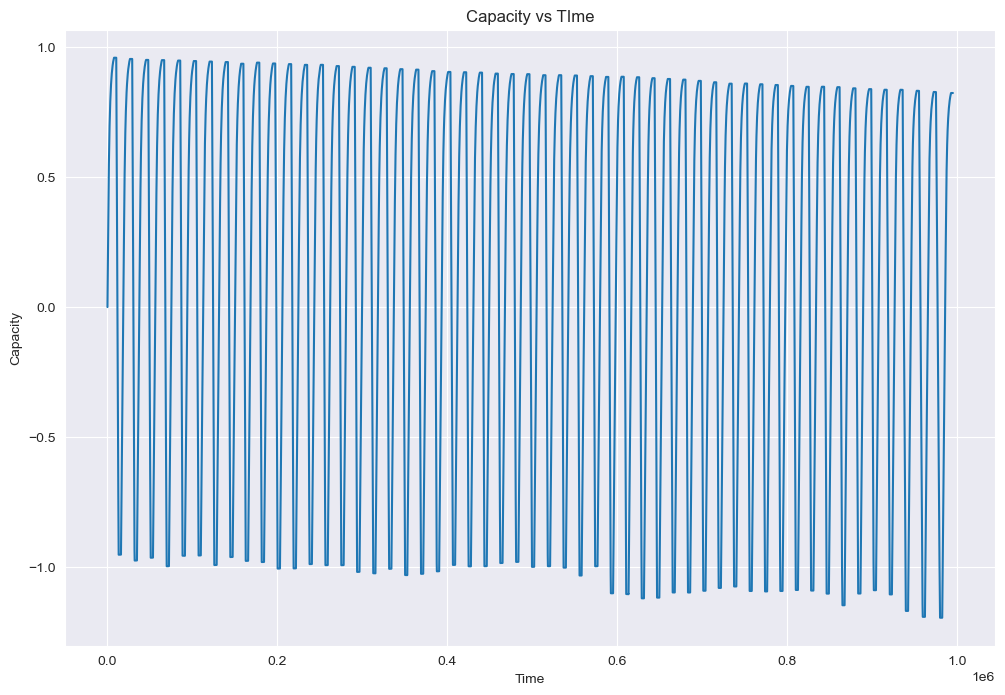

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

CPU times: total: 5min 44s
Wall time: 5min 47s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

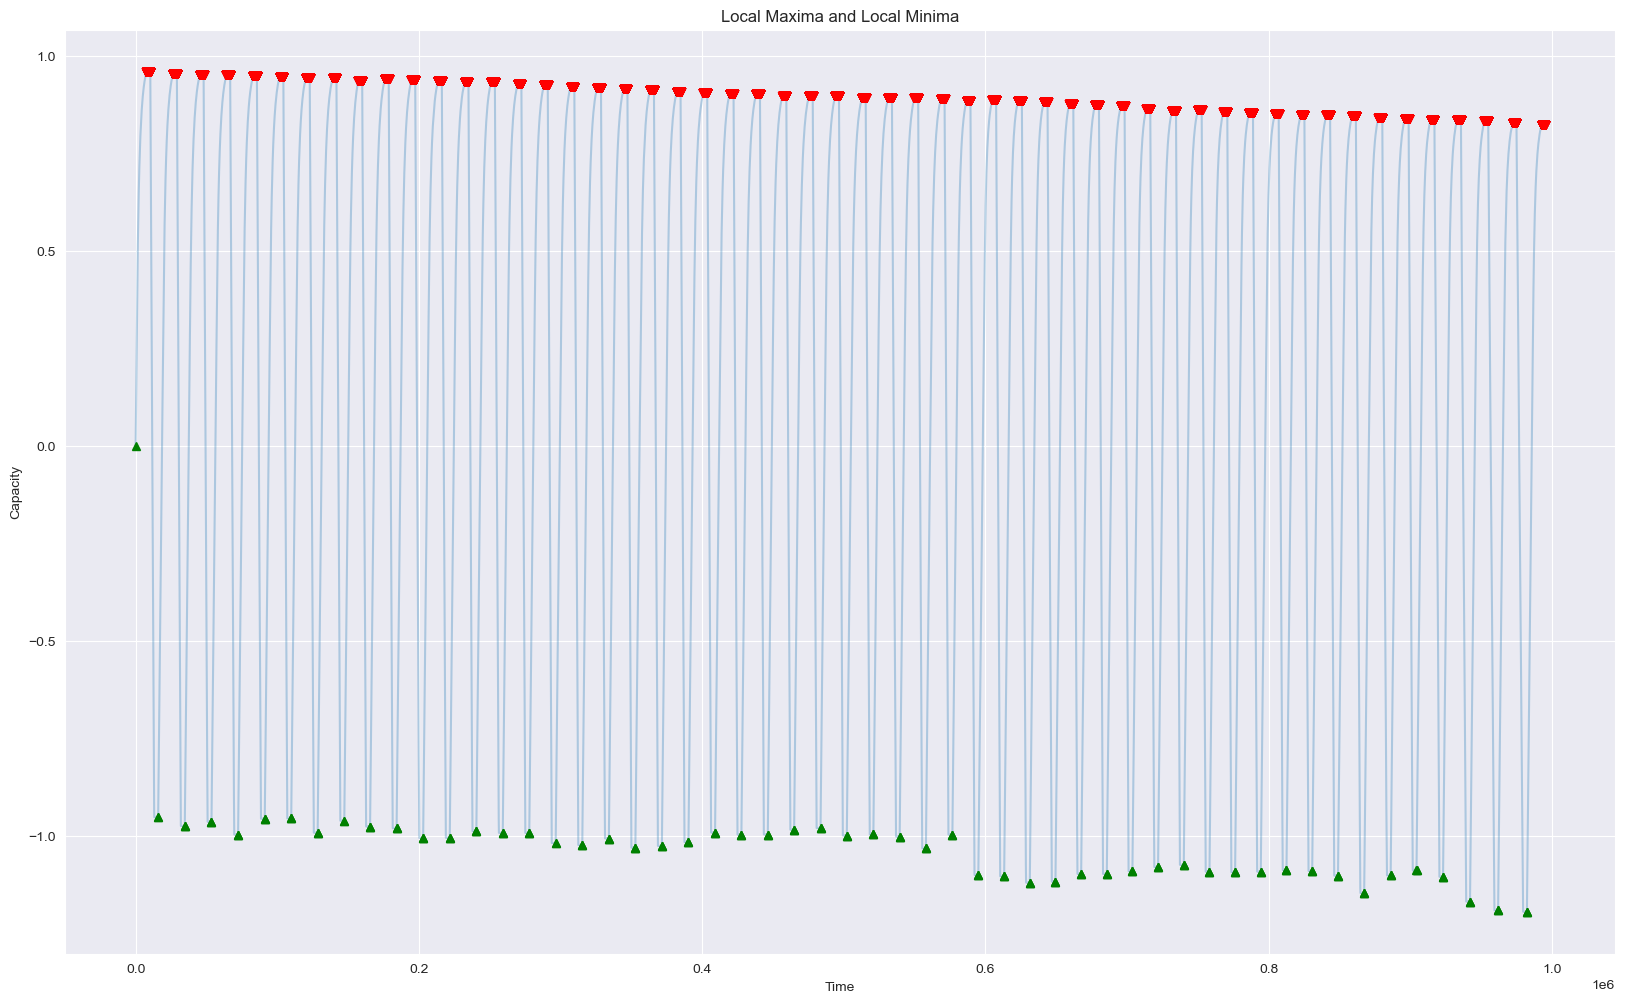

In [13]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [14]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [15]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
0.9593194444444445
[ 0.         -0.95302222 -0.97546389 -0.96463333 -0.99741667 -0.95675833
 -0.95597778 -0.99267778 -0.96201111 -0.97678611 -0.98126111 -1.00638611
 -1.00568333 -0.989225   -0.99324167 -0.99336111 -1.01925278 -1.024275
 -1.00729444 -1.03115278 -1.02656667 -1.01694444 -0.99236667 -0.99746111
 -0.99722778 -0.98508056 -0.98075833 -0.99984722 -0.99675556 -1.00235556
 -1.03265833 -

In [16]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [17]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


# Integral current

In [18]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

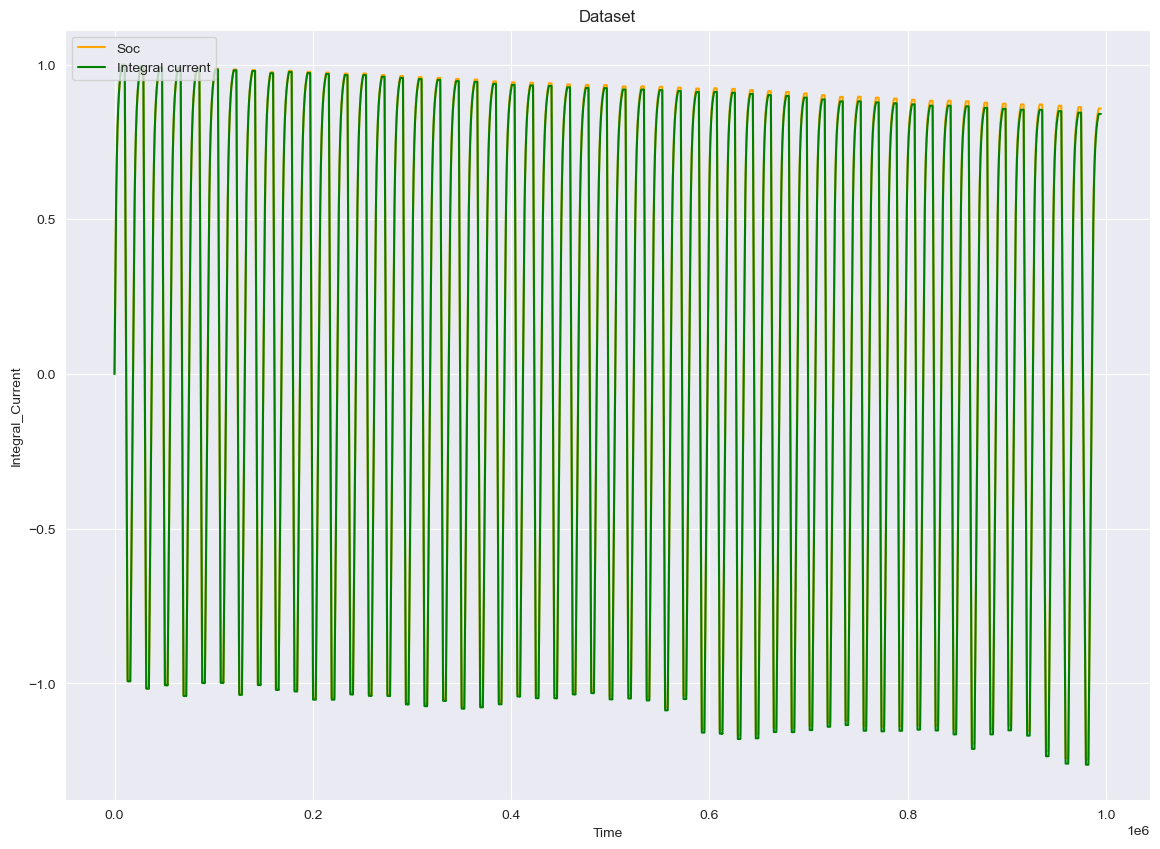

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [20]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737,0.000181
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510,0.000542
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812,0.000903
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338,0.001264


In [21]:
df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [22]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Power,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,0.285109,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,3.993079,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-9.777741,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,0.000000,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,0.303331,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3.339343,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,5.730082,3453.550000,0.999371


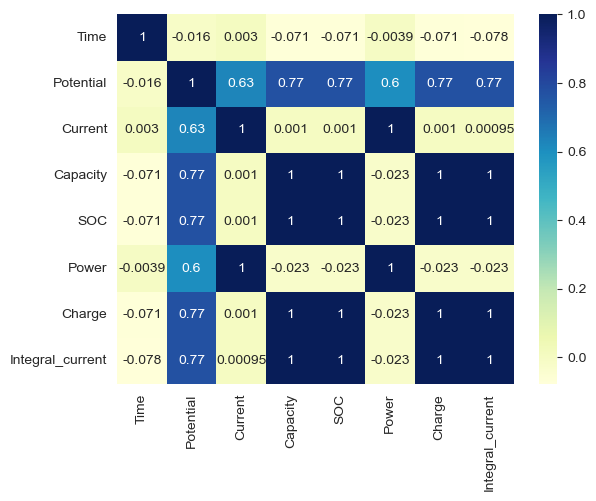

<Figure size 1400x1000 with 0 Axes>

In [23]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [24]:
timest = df.pop('Time')

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Potential','Current','Capacity','Charge','SOC','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [26]:
df.head()

,Potential,Current,Capacity,SOC,Power,Charge,Integral_current
0,0.822158,0.969868,0.554717,0.554717,4.919672,0.554717,0.558203
1,0.824159,0.969847,0.554823,0.554823,4.922976,0.554823,0.558283
2,0.826242,0.969850,0.554996,0.554996,4.926784,0.554996,0.558443
3,0.828049,0.969850,0.555148,0.555148,4.930054,0.555148,0.558602
4,0.829519,0.969850,0.555320,0.555320,4.932712,0.555320,0.558762


In [27]:
Y = df.pop('Power')
X = df

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [29]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 6), (198976, 6), (795903,), (198976,))

In [30]:
X_train.head()

,Potential,Current,Capacity,SOC,Charge,Integral_current
890836,0.999621,0.854943,0.789883,0.789883,0.789883,0.784159
871221,0.936723,0.969677,0.637593,0.637593,0.637593,0.633092
950170,0.999586,0.677702,0.919990,0.919990,0.919990,0.912861
660,0.945235,0.969734,0.660839,0.660839,0.660839,0.663451
903464,0.490418,0.647200,0.049146,0.049146,0.049146,0.049125


In [31]:
Y_train.head()

890836    3.374130
871221    5.123895
950170    0.495393
660       5.140193
903464    0.000000
Name: Power, dtype: float64

In [32]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [35]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [36]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(70,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'linear'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 20s 3ms/step - loss: 0.2331 - rmse: 0.4653 - mae: 0.2331 - mse: 0.2165 - mape: 48202980.0000 - val_loss: 0.2006 - val_rmse: 0.3071 - val_mae: 0.2006 - val_mse: 0.0943 - val_mape: 31322750.0000
Epoch 2/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.2020 - rmse: 0.3079 - mae: 0.2020 - mse: 0.0948 - mape: 41077088.0000 - val_loss: 0.1980 - val_rmse: 0.3054 - val_mae: 0.1980 - val_mse: 0.0933 - val_mape: 35381068.0000
Epoch 3/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.2002 - rmse: 0.3072 - mae: 0.2002 - mse: 0.0943 - mape: 39948224.0000 - val_loss: 0.1977 - val_rmse: 0.3111 - val_mae: 0.1977 - val_mse: 0.0968 - val_mape: 38990352.0000
Epoch 4/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1992 - rmse: 0.3069 - mae: 0.1992 - mse: 0.0942 - mape: 39156428.0000 - val_loss: 0.2008 - val_rmse: 0.3161 - val_mae: 0.2008 - val_mse: 0.0999 - val_mape: 28462784.0000


Epoch 34/100
6218/6218 [==============================] - 25s 4ms/step - loss: 0.1954 - rmse: 0.3059 - mae: 0.1954 - mse: 0.0936 - mape: 34199468.0000 - val_loss: 0.1948 - val_rmse: 0.3085 - val_mae: 0.1948 - val_mse: 0.0952 - val_mape: 34938416.0000
Epoch 35/100
6218/6218 [==============================] - 25s 4ms/step - loss: 0.1953 - rmse: 0.3058 - mae: 0.1953 - mse: 0.0935 - mape: 34160652.0000 - val_loss: 0.1950 - val_rmse: 0.2996 - val_mae: 0.1950 - val_mse: 0.0898 - val_mape: 37994940.0000
Epoch 36/100
6218/6218 [==============================] - 25s 4ms/step - loss: 0.1953 - rmse: 0.3059 - mae: 0.1953 - mse: 0.0936 - mape: 34199992.0000 - val_loss: 0.1946 - val_rmse: 0.3047 - val_mae: 0.1946 - val_mse: 0.0929 - val_mape: 33761160.0000
Epoch 37/100
6218/6218 [==============================] - 25s 4ms/step - loss: 0.1953 - rmse: 0.3057 - mae: 0.1953 - mse: 0.0935 - mape: 34143964.0000 - val_loss: 0.1962 - val_rmse: 0.3112 - val_mae: 0.1962 - val_mse: 0.0969 - val_mape: 27870346.0

Epoch 67/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.1950 - rmse: 0.3059 - mae: 0.1950 - mse: 0.0936 - mape: 33525656.0000 - val_loss: 0.1945 - val_rmse: 0.3045 - val_mae: 0.1945 - val_mse: 0.0927 - val_mape: 32106480.0000
Epoch 68/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.1949 - rmse: 0.3058 - mae: 0.1949 - mse: 0.0935 - mape: 33549450.0000 - val_loss: 0.1945 - val_rmse: 0.3048 - val_mae: 0.1945 - val_mse: 0.0929 - val_mape: 32995996.0000
Epoch 69/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.1950 - rmse: 0.3059 - mae: 0.1950 - mse: 0.0936 - mape: 33458726.0000 - val_loss: 0.1949 - val_rmse: 0.2993 - val_mae: 0.1949 - val_mse: 0.0896 - val_mape: 36481628.0000
Epoch 70/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.1950 - rmse: 0.3057 - mae: 0.1950 - mse: 0.0934 - mape: 33551568.0000 - val_loss: 0.1946 - val_rmse: 0.3050 - val_mae: 0.1946 - val_mse: 0.0930 - val_mape: 31192100.0

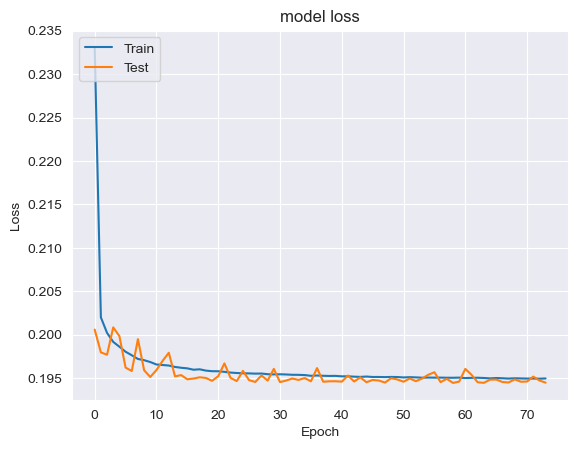

In [37]:
plot_his(history_1)

In [38]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1945 - rmse: 0.3037 - mae: 0.1945 - mse: 0.0922 - mape: 32237338.0000


[0.19447334110736847,
 0.30366095900535583,
 0.19447334110736847,
 0.09220997989177704,
 32237338.0]

In [39]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


In [40]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                490       
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


In [41]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  10190.916


# Model 2

In [42]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0329 - rmse: 0.2353 - mae: 0.0329 - mse: 0.0554 - mape: 10887219.0000 - val_loss: 0.0092 - val_rmse: 0.0195 - val_mae: 0.0092 - val_mse: 3.7896e-04 - val_mape: 4718362.0000
Epoch 2/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0065 - rmse: 0.0161 - mae: 0.0065 - mse: 2.5971e-04 - mape: 3567168.2500 - val_loss: 0.0051 - val_rmse: 0.0148 - val_mae: 0.0051 - val_mse: 2.2002e-04 - val_mape: 2910301.0000
Epoch 3/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0045 - rmse: 0.0135 - mae: 0.0045 - mse: 1.8139e-04 - mape: 2445235.7500 - val_loss: 0.0037 - val_rmse: 0.0128 - val_mae: 0.0037 - val_mse: 1.6503e-04 - val_mape: 1801941.1250
Epoch 4/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0033 - rmse: 0.0122 - mae: 0.0033 - mse: 1.4782e-04 - mape: 1526838.5000 - val_loss: 0.0029 - val_rmse: 0.0122 - val_mae: 0.0029 - val_mse: 1.4807e

Epoch 33/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0012 - rmse: 0.0104 - mae: 0.0012 - mse: 1.0839e-04 - mape: 172532.9844 - val_loss: 0.0012 - val_rmse: 0.0107 - val_mae: 0.0012 - val_mse: 1.1523e-04 - val_mape: 164210.0625
Epoch 34/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0012 - rmse: 0.0104 - mae: 0.0012 - mse: 1.0805e-04 - mape: 169563.1875 - val_loss: 0.0013 - val_rmse: 0.0107 - val_mae: 0.0013 - val_mse: 1.1489e-04 - val_mape: 170537.0312
Epoch 35/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0012 - rmse: 0.0104 - mae: 0.0012 - mse: 1.0771e-04 - mape: 166874.5781 - val_loss: 0.0012 - val_rmse: 0.0107 - val_mae: 0.0012 - val_mse: 1.1452e-04 - val_mape: 161461.9844
Epoch 36/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0012 - rmse: 0.0104 - mae: 0.0012 - mse: 1.0739e-04 - mape: 164032.8438 - val_loss: 0.0013 - val_rmse: 0.0107 - val_mae: 0.0013 - val_mse: 1.1421e

Epoch 65/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.0011 - rmse: 0.0100 - mae: 0.0011 - mse: 1.0007e-04 - mape: 128721.3594 - val_loss: 0.0011 - val_rmse: 0.0103 - val_mae: 0.0011 - val_mse: 1.0636e-04 - val_mape: 127204.4453
Epoch 66/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0011 - rmse: 0.0100 - mae: 0.0011 - mse: 9.9896e-05 - mape: 128273.3594 - val_loss: 0.0011 - val_rmse: 0.0103 - val_mae: 0.0011 - val_mse: 1.0617e-04 - val_mape: 123892.2188
Epoch 67/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0011 - rmse: 0.0100 - mae: 0.0011 - mse: 9.9693e-05 - mape: 127761.9688 - val_loss: 0.0011 - val_rmse: 0.0103 - val_mae: 0.0011 - val_mse: 1.0597e-04 - val_mape: 125215.5703
Epoch 68/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0011 - rmse: 0.0100 - mae: 0.0011 - mse: 9.9489e-05 - mape: 127254.9688 - val_loss: 0.0011 - val_rmse: 0.0103 - val_mae: 0.0011 - val_mse: 1.0571e

Epoch 97/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0010 - rmse: 0.0097 - mae: 0.0010 - mse: 9.4515e-05 - mape: 118601.9766 - val_loss: 0.0011 - val_rmse: 0.0100 - val_mae: 0.0011 - val_mse: 1.0043e-04 - val_mape: 114328.0469
Epoch 98/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0010 - rmse: 0.0097 - mae: 0.0010 - mse: 9.4375e-05 - mape: 118452.1484 - val_loss: 0.0011 - val_rmse: 0.0100 - val_mae: 0.0011 - val_mse: 1.0026e-04 - val_mape: 119665.2891
Epoch 99/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.0010 - rmse: 0.0097 - mae: 0.0010 - mse: 9.4232e-05 - mape: 118354.0156 - val_loss: 0.0011 - val_rmse: 0.0100 - val_mae: 0.0011 - val_mse: 1.0011e-04 - val_mape: 114216.7109
Epoch 100/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0010 - rmse: 0.0097 - mae: 0.0010 - mse: 9.4056e-05 - mape: 117985.3516 - val_loss: 0.0011 - val_rmse: 0.0100 - val_mae: 0.0011 - val_mse: 9.9915

In [43]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0011 - rmse: 0.0100 - mae: 0.0011 - mse: 9.9915e-05 - mape: 115284.5625


[0.0010605009738355875,
 0.009995734319090843,
 0.0010605009738355875,
 9.991470869863406e-05,
 115284.5625]

In [44]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


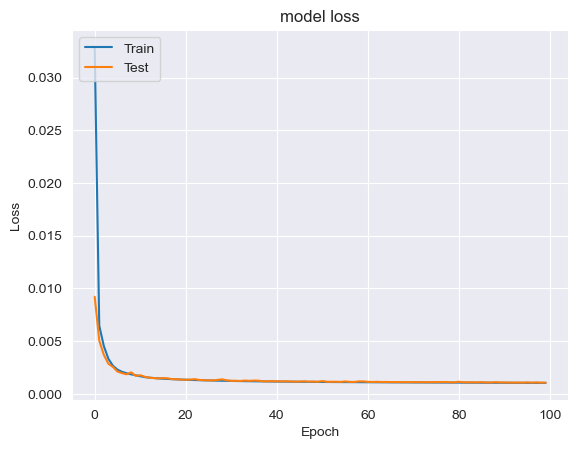

In [45]:
plot_his(history_2)

In [46]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11630.381


# Model 3

In [47]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=128, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 22s 3ms/step - loss: 0.1071 - rmse: 0.4047 - mae: 0.1071 - mse: 0.1638 - mape: 25722806.0000 - val_loss: 0.0177 - val_rmse: 0.0574 - val_mae: 0.0177 - val_mse: 0.0033 - val_mape: 2904051.2500
Epoch 2/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.0324 - rmse: 0.0648 - mae: 0.0324 - mse: 0.0042 - mape: 7214370.5000 - val_loss: 0.0189 - val_rmse: 0.0576 - val_mae: 0.0189 - val_mse: 0.0033 - val_mape: 2211604.2500
Epoch 3/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0265 - rmse: 0.0603 - mae: 0.0265 - mse: 0.0036 - mape: 5561794.0000 - val_loss: 0.0185 - val_rmse: 0.0559 - val_mae: 0.0185 - val_mse: 0.0031 - val_mape: 2882748.0000
Epoch 4/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0210 - rmse: 0.0566 - mae: 0.0210 - mse: 0.0032 - mape: 4032044.0000 - val_loss: 0.0307 - val_rmse: 0.0608 - val_mae: 0.0307 - val_mse: 0.0037 - val_mape: 6571730.5000
Epoch 5

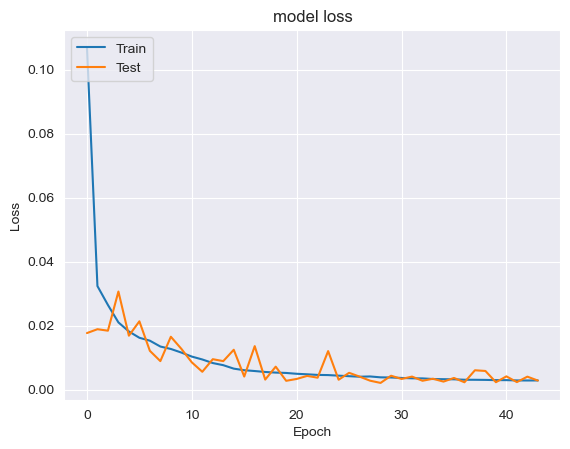

In [48]:
plot_his(history_3)

In [49]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.0029 - rmse: 0.0095 - mae: 0.0029 - mse: 9.0336e-05 - mape: 492180.7812


[0.0028694786597043276,
 0.009504526853561401,
 0.0028694786597043276,
 9.033603419084102e-05,
 492180.78125]

In [50]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [51]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  9150.3955


# Model 4

In [52]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0460 - rmse: 0.2243 - mae: 0.0460 - mse: 0.0503 - mape: 7372287.5000 - val_loss: 0.0196 - val_rmse: 0.0446 - val_mae: 0.0196 - val_mse: 0.0020 - val_mape: 1443669.3750
Epoch 2/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0157 - rmse: 0.0379 - mae: 0.0157 - mse: 0.0014 - mape: 1062386.3750 - val_loss: 0.0124 - val_rmse: 0.0336 - val_mae: 0.0124 - val_mse: 0.0011 - val_mape: 684220.7500
Epoch 3/100
24872/24872 [==============================] - 64s 3ms/step - loss: 0.0106 - rmse: 0.0308 - mae: 0.0106 - mse: 9.4843e-04 - mape: 787147.0000 - val_loss: 0.0085 - val_rmse: 0.0297 - val_mae: 0.0085 - val_mse: 8.8164e-04 - val_mape: 569044.0000
Epoch 4/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0068 - rmse: 0.0288 - mae: 0.0068 - mse: 8.2776e-04 - mape: 595242.0625 - val_loss: 0.0053 - val_rmse: 0.0290 - val_mae: 0.0053 - val_mse: 8.4335e-04 - val_mape: 3

Epoch 33/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.0031 - rmse: 0.0226 - mae: 0.0031 - mse: 5.1242e-04 - mape: 189000.9062 - val_loss: 0.0032 - val_rmse: 0.0231 - val_mae: 0.0032 - val_mse: 5.3277e-04 - val_mape: 175645.9062
Epoch 34/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0031 - rmse: 0.0226 - mae: 0.0031 - mse: 5.1061e-04 - mape: 188184.7969 - val_loss: 0.0031 - val_rmse: 0.0230 - val_mae: 0.0031 - val_mse: 5.3092e-04 - val_mape: 176078.2188
Epoch 35/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.0031 - rmse: 0.0226 - mae: 0.0031 - mse: 5.0878e-04 - mape: 186247.0625 - val_loss: 0.0032 - val_rmse: 0.0230 - val_mae: 0.0032 - val_mse: 5.2899e-04 - val_mape: 178090.3438
Epoch 36/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0031 - rmse: 0.0225 - mae: 0.0031 - mse: 5.0714e-04 - mape: 185250.6094 - val_loss: 0.0032 - val_rmse: 0.0230 - val_mae: 0.0032 - val_mse: 5.2761e

Epoch 65/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0029 - rmse: 0.0218 - mae: 0.0029 - mse: 4.7526e-04 - mape: 160568.7344 - val_loss: 0.0030 - val_rmse: 0.0222 - val_mae: 0.0030 - val_mse: 4.9388e-04 - val_mape: 143613.7188
Epoch 66/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0029 - rmse: 0.0218 - mae: 0.0029 - mse: 4.7457e-04 - mape: 159667.1562 - val_loss: 0.0030 - val_rmse: 0.0222 - val_mae: 0.0030 - val_mse: 4.9287e-04 - val_mape: 156243.5156
Epoch 67/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0029 - rmse: 0.0218 - mae: 0.0029 - mse: 4.7385e-04 - mape: 159194.7969 - val_loss: 0.0030 - val_rmse: 0.0222 - val_mae: 0.0030 - val_mse: 4.9237e-04 - val_mape: 144446.7500
Epoch 68/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0029 - rmse: 0.0218 - mae: 0.0029 - mse: 4.7316e-04 - mape: 158729.7969 - val_loss: 0.0030 - val_rmse: 0.0222 - val_mae: 0.0030 - val_mse: 4.9150e

Epoch 97/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0028 - rmse: 0.0214 - mae: 0.0028 - mse: 4.5698e-04 - mape: 149868.9062 - val_loss: 0.0029 - val_rmse: 0.0218 - val_mae: 0.0029 - val_mse: 4.7440e-04 - val_mape: 145286.2812
Epoch 98/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0028 - rmse: 0.0214 - mae: 0.0028 - mse: 4.5655e-04 - mape: 149550.8594 - val_loss: 0.0029 - val_rmse: 0.0218 - val_mae: 0.0029 - val_mse: 4.7417e-04 - val_mape: 142192.1719
Epoch 99/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0028 - rmse: 0.0214 - mae: 0.0028 - mse: 4.5610e-04 - mape: 149454.8281 - val_loss: 0.0029 - val_rmse: 0.0218 - val_mae: 0.0029 - val_mse: 4.7360e-04 - val_mape: 136101.3281
Epoch 100/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0028 - rmse: 0.0213 - mae: 0.0028 - mse: 4.5569e-04 - mape: 149297.3125 - val_loss: 0.0029 - val_rmse: 0.0218 - val_mae: 0.0029 - val_mse: 4.7321

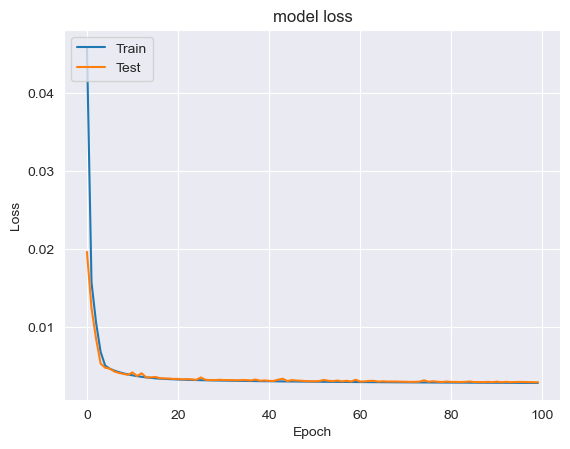

In [53]:
plot_his(history_4)

In [54]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0029 - rmse: 0.0218 - mae: 0.0029 - mse: 4.7321e-04 - mape: 135734.2969


[0.002886636182665825,
 0.021753404289484024,
 0.002886636182665825,
 0.00047321055899374187,
 135734.296875]

In [55]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [56]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  23970.402


# Model 5

In [57]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 197s 8ms/step - loss: 0.1680 - rmse: 0.4080 - mae: 0.1680 - mse: 0.1665 - mape: 37471476.0000 - val_loss: 0.0842 - val_rmse: 0.1862 - val_mae: 0.0842 - val_mse: 0.0347 - val_mape: 24801972.0000
Epoch 2/50
24872/24872 [==============================] - 186s 7ms/step - loss: 0.0525 - rmse: 0.1153 - mae: 0.0525 - mse: 0.0133 - mape: 14844278.0000 - val_loss: 0.0276 - val_rmse: 0.0453 - val_mae: 0.0276 - val_mse: 0.0021 - val_mape: 7527541.0000
Epoch 3/50
24872/24872 [==============================] - 185s 7ms/step - loss: 0.0272 - rmse: 0.0420 - mae: 0.0272 - mse: 0.0018 - mape: 7709872.5000 - val_loss: 0.0202 - val_rmse: 0.0325 - val_mae: 0.0202 - val_mse: 0.0011 - val_mape: 5655609.0000
Epoch 4/50
24872/24872 [==============================] - 200s 8ms/step - loss: 0.0206 - rmse: 0.0312 - mae: 0.0206 - mse: 9.7282e-04 - mape: 4979541.5000 - val_loss: 0.0196 - val_rmse: 0.0286 - val_mae: 0.0196 - val_mse: 8.1915e-04 - val_mape: 52

Epoch 33/50
24872/24872 [==============================] - 175s 7ms/step - loss: 0.0045 - rmse: 0.0078 - mae: 0.0045 - mse: 6.0520e-05 - mape: 903129.6875 - val_loss: 0.0041 - val_rmse: 0.0079 - val_mae: 0.0041 - val_mse: 6.1934e-05 - val_mape: 655277.8125
Epoch 34/50
24872/24872 [==============================] - 174s 7ms/step - loss: 0.0044 - rmse: 0.0077 - mae: 0.0044 - mse: 5.9222e-05 - mape: 892455.7500 - val_loss: 0.0040 - val_rmse: 0.0073 - val_mae: 0.0040 - val_mse: 5.3924e-05 - val_mape: 693286.6250
Epoch 35/50
24872/24872 [==============================] - 175s 7ms/step - loss: 0.0043 - rmse: 0.0076 - mae: 0.0043 - mse: 5.7562e-05 - mape: 869270.6875 - val_loss: 0.0045 - val_rmse: 0.0076 - val_mae: 0.0045 - val_mse: 5.7813e-05 - val_mape: 896395.0625
Epoch 36/50
24872/24872 [==============================] - 177s 7ms/step - loss: 0.0043 - rmse: 0.0075 - mae: 0.0043 - mse: 5.6186e-05 - mape: 856001.5000 - val_loss: 0.0046 - val_rmse: 0.0075 - val_mae: 0.0046 - val_mse: 5.6407e

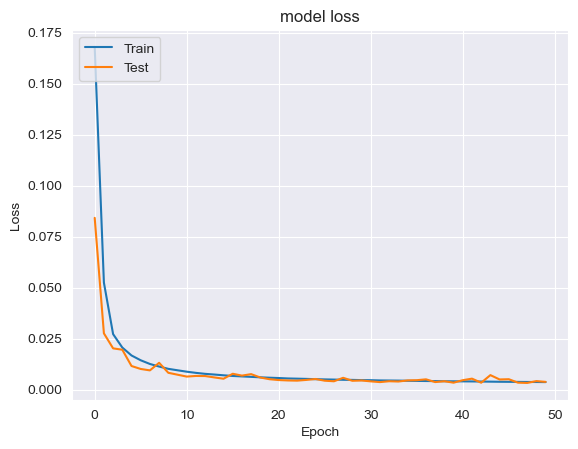

In [58]:
plot_his(history_5)

In [59]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 32s 5ms/step - loss: 0.0038 - rmse: 0.0066 - mae: 0.0038 - mse: 4.3938e-05 - mape: 712925.8125


[0.0037929872050881386,
 0.006628565024584532,
 0.0037929872050881386,
 4.3937874579569325e-05,
 712925.8125]

In [60]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [61]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [62]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25730.393


# Model 6

In [63]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 199s 8ms/step - loss: 0.1166 - rmse: 0.3502 - mae: 0.1166 - mse: 0.1226 - mape: 25729454.0000 - val_loss: 0.0414 - val_rmse: 0.0802 - val_mae: 0.0414 - val_mse: 0.0064 - val_mape: 8860547.0000
Epoch 2/40
24872/24872 [==============================] - 188s 8ms/step - loss: 0.0297 - rmse: 0.0563 - mae: 0.0297 - mse: 0.0032 - mape: 7040620.0000 - val_loss: 0.0389 - val_rmse: 0.0557 - val_mae: 0.0389 - val_mse: 0.0031 - val_mape: 8849452.0000
Epoch 3/40
24872/24872 [==============================] - 188s 8ms/step - loss: 0.0198 - rmse: 0.0378 - mae: 0.0198 - mse: 0.0014 - mape: 4841982.0000 - val_loss: 0.0289 - val_rmse: 0.0412 - val_mae: 0.0289 - val_mse: 0.0017 - val_mape: 8404852.0000
Epoch 4/40
24872/24872 [==============================] - 193s 8ms/step - loss: 0.0147 - rmse: 0.0275 - mae: 0.0147 - mse: 7.5710e-04 - mape: 3724882.0000 - val_loss: 0.0145 - val_rmse: 0.0253 - val_mae: 0.0145 - val_mse: 6.3826e-04 - val_mape: 3287

Epoch 33/40
24872/24872 [==============================] - 197s 8ms/step - loss: 0.0030 - rmse: 0.0060 - mae: 0.0030 - mse: 3.6581e-05 - mape: 620164.8750 - val_loss: 0.0048 - val_rmse: 0.0079 - val_mae: 0.0048 - val_mse: 6.2808e-05 - val_mape: 1062956.5000
Epoch 34/40
24872/24872 [==============================] - 195s 8ms/step - loss: 0.0030 - rmse: 0.0060 - mae: 0.0030 - mse: 3.5805e-05 - mape: 607259.8750 - val_loss: 0.0027 - val_rmse: 0.0058 - val_mae: 0.0027 - val_mse: 3.3565e-05 - val_mape: 504299.2188
Epoch 35/40
24872/24872 [==============================] - 195s 8ms/step - loss: 0.0030 - rmse: 0.0059 - mae: 0.0030 - mse: 3.5066e-05 - mape: 599118.3750 - val_loss: 0.0030 - val_rmse: 0.0059 - val_mae: 0.0030 - val_mse: 3.5024e-05 - val_mape: 500591.7812
Epoch 36/40
24872/24872 [==============================] - 195s 8ms/step - loss: 0.0029 - rmse: 0.0059 - mae: 0.0029 - mse: 3.4279e-05 - mape: 587274.1875 - val_loss: 0.0025 - val_rmse: 0.0056 - val_mae: 0.0025 - val_mse: 3.1293

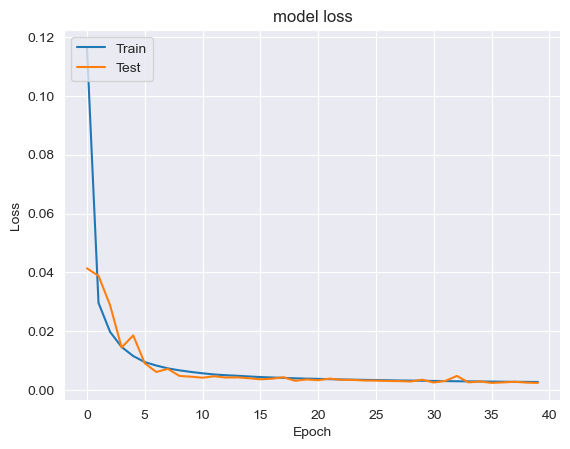

In [64]:
plot_his(history_6)

In [65]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 22s 4ms/step - loss: 0.0025 - rmse: 0.0055 - mae: 0.0025 - mse: 2.9953e-05 - mape: 467724.5625


[0.0024777809157967567,
 0.005472967401146889,
 0.0024777809157967567,
 2.9953373086755164e-05,
 467724.5625]

In [66]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [67]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 20s 3ms/step


In [68]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65870.38


# Model 7

In [69]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 58s 8ms/step - loss: 0.3129 - rmse: 0.7988 - mae: 0.3129 - mse: 0.6381 - mape: 50004340.0000 - val_loss: 0.1611 - val_rmse: 0.2710 - val_mae: 0.1611 - val_mse: 0.0734 - val_mape: 33760104.0000
Epoch 2/70
6218/6218 [==============================] - 52s 8ms/step - loss: 0.1507 - rmse: 0.2517 - mae: 0.1507 - mse: 0.0633 - mape: 32215504.0000 - val_loss: 0.1166 - val_rmse: 0.2199 - val_mae: 0.1166 - val_mse: 0.0484 - val_mape: 24404272.0000
Epoch 3/70
6218/6218 [==============================] - 49s 8ms/step - loss: 0.1111 - rmse: 0.2027 - mae: 0.1111 - mse: 0.0411 - mape: 26262820.0000 - val_loss: 0.1082 - val_rmse: 0.1909 - val_mae: 0.1082 - val_mse: 0.0364 - val_mape: 30730654.0000
Epoch 4/70
6218/6218 [==============================] - 50s 8ms/step - loss: 0.0819 - rmse: 0.1670 - mae: 0.0819 - mse: 0.0279 - mape: 21417396.0000 - val_loss: 0.0591 - val_rmse: 0.1498 - val_mae: 0.0591 - val_mse: 0.0225 - val_mape: 15853412.0000
Epoc

6218/6218 [==============================] - 53s 8ms/step - loss: 0.0057 - rmse: 0.0109 - mae: 0.0057 - mse: 1.1924e-04 - mape: 987874.2500 - val_loss: 0.0047 - val_rmse: 0.0106 - val_mae: 0.0047 - val_mse: 1.1342e-04 - val_mape: 541191.8750
Epoch 66/70
6218/6218 [==============================] - 54s 9ms/step - loss: 0.0057 - rmse: 0.0109 - mae: 0.0057 - mse: 1.1949e-04 - mape: 1022529.5625 - val_loss: 0.0079 - val_rmse: 0.0126 - val_mae: 0.0079 - val_mse: 1.5899e-04 - val_mape: 1715794.6250
Epoch 67/70
6218/6218 [==============================] - 55s 9ms/step - loss: 0.0056 - rmse: 0.0108 - mae: 0.0056 - mse: 1.1622e-04 - mape: 979577.4375 - val_loss: 0.0047 - val_rmse: 0.0105 - val_mae: 0.0047 - val_mse: 1.0978e-04 - val_mape: 585272.2500
Epoch 68/70
6218/6218 [==============================] - 55s 9ms/step - loss: 0.0055 - rmse: 0.0107 - mae: 0.0055 - mse: 1.1453e-04 - mape: 963182.7500 - val_loss: 0.0048 - val_rmse: 0.0105 - val_mae: 0.0048 - val_mse: 1.1082e-04 - val_mape: 609297

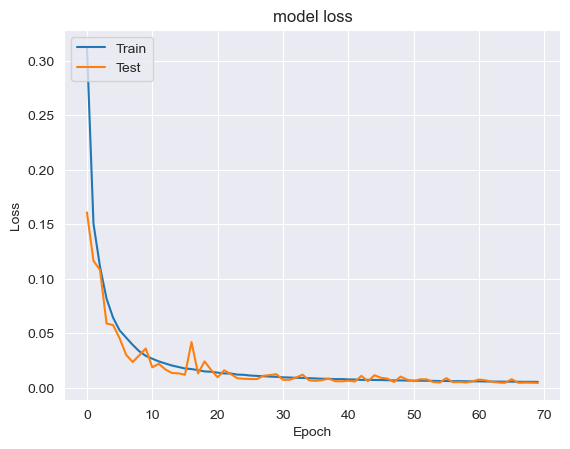

In [70]:
plot_his(history_7)

In [71]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 19s 3ms/step


In [72]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 22s 3ms/step - loss: 0.0046 - rmse: 0.0102 - mae: 0.0046 - mse: 1.0366e-04 - mape: 633436.5625


[0.004566848743706942,
 0.010181533172726631,
 0.004566848743706942,
 0.000103663609479554,
 633436.5625]

In [73]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [74]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11230.376


# Model 8

In [75]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 141s 11ms/step - loss: 0.2184 - rmse: 0.4807 - mae: 0.2184 - mse: 0.2311 - mape: 44530324.0000 - val_loss: 0.1420 - val_rmse: 0.2269 - val_mae: 0.1420 - val_mse: 0.0515 - val_mape: 32486594.0000
Epoch 2/40
12436/12436 [==============================] - 135s 11ms/step - loss: 0.1238 - rmse: 0.1993 - mae: 0.1238 - mse: 0.0397 - mape: 27191874.0000 - val_loss: 0.1064 - val_rmse: 0.1773 - val_mae: 0.1064 - val_mse: 0.0314 - val_mape: 21864408.0000
Epoch 3/40
12436/12436 [==============================] - 135s 11ms/step - loss: 0.0984 - rmse: 0.1665 - mae: 0.0984 - mse: 0.0277 - mape: 20529708.0000 - val_loss: 0.0896 - val_rmse: 0.1557 - val_mae: 0.0896 - val_mse: 0.0243 - val_mape: 18268890.0000
Epoch 4/40
12436/12436 [==============================] - 132s 11ms/step - loss: 0.0847 - rmse: 0.1498 - mae: 0.0847 - mse: 0.0224 - mape: 17896706.0000 - val_loss: 0.0806 - val_rmse: 0.1449 - val_mae: 0.0806 - val_mse: 0.0210 - val_mape: 17

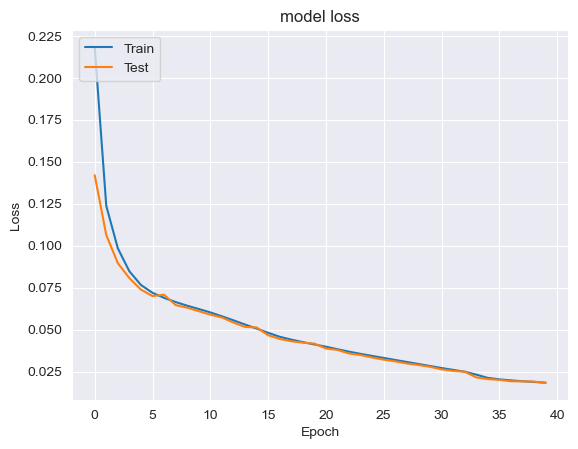

In [76]:
plot_his(history_8)

In [77]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 23s 4ms/step


In [78]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 28s 4ms/step - loss: 0.0182 - rmse: 0.0595 - mae: 0.0182 - mse: 0.0035 - mape: 8138656.5000


[0.01822187937796116,
 0.05947912484407425,
 0.01822187937796116,
 0.0035377664025872946,
 8138656.5]

In [79]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  65870.39


# Model 9

In [80]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0531 - rmse: 0.3839 - mae: 0.0531 - mse: 0.1474 - mape: 8793565.0000 - val_loss: 0.0123 - val_rmse: 0.0232 - val_mae: 0.0123 - val_mse: 5.3800e-04 - val_mape: 1657491.5000
Epoch 2/50
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0120 - rmse: 0.0230 - mae: 0.0120 - mse: 5.3084e-04 - mape: 2056414.2500 - val_loss: 0.0105 - val_rmse: 0.0219 - val_mae: 0.0105 - val_mse: 4.8079e-04 - val_mape: 1481812.6250
Epoch 3/50
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0108 - rmse: 0.0220 - mae: 0.0108 - mse: 4.8226e-04 - mape: 1618137.5000 - val_loss: 0.0109 - val_rmse: 0.0221 - val_mae: 0.0109 - val_mse: 4.8695e-04 - val_mape: 2093964.1250
Epoch 4/50
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0101 - rmse: 0.0213 - mae: 0.0101 - mse: 4.5210e-04 - mape: 1418738.7500 - val_loss: 0.0095 - val_rmse: 0.0209 - val_mae: 0.0095 - val_mse: 4.3685e-04 -

Epoch 33/50
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0076 - rmse: 0.0173 - mae: 0.0076 - mse: 2.9994e-04 - mape: 926149.0625 - val_loss: 0.0077 - val_rmse: 0.0174 - val_mae: 0.0077 - val_mse: 3.0337e-04 - val_mape: 788298.6250
Epoch 34/50
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0076 - rmse: 0.0173 - mae: 0.0076 - mse: 2.9821e-04 - mape: 921911.9375 - val_loss: 0.0076 - val_rmse: 0.0173 - val_mae: 0.0076 - val_mse: 3.0041e-04 - val_mape: 810536.1875
Epoch 35/50
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0076 - rmse: 0.0172 - mae: 0.0076 - mse: 2.9646e-04 - mape: 915411.4375 - val_loss: 0.0076 - val_rmse: 0.0173 - val_mae: 0.0076 - val_mse: 2.9970e-04 - val_mape: 850803.9375
Epoch 36/50
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0076 - rmse: 0.0172 - mae: 0.0076 - mse: 2.9518e-04 - mape: 912474.7500 - val_loss: 0.0076 - val_rmse: 0.0173 - val_mae: 0.0076 - val_mse: 2.9834e-04 

In [81]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.0074 - rmse: 0.0168 - mae: 0.0074 - mse: 2.8120e-04 - mape: 920541.4375


[0.0073769306764006615,
 0.016769099980592728,
 0.0073769306764006615,
 0.0002812027232721448,
 920541.4375]

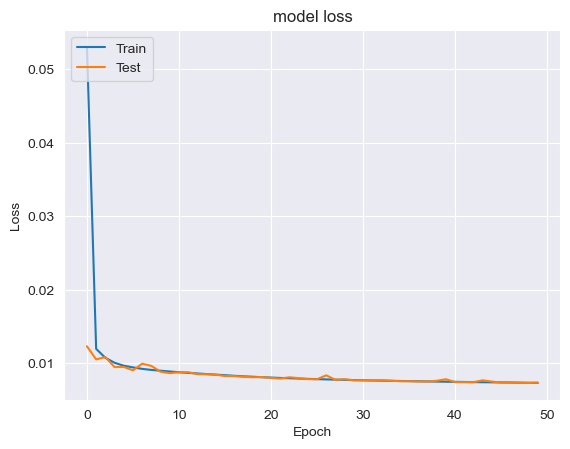

In [82]:
plot_his(history_9)

In [83]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [84]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  770.36774


# Model 10

In [85]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0507 - rmse: 0.2409 - mae: 0.0507 - mse: 0.0580 - mape: 13013315.0000 - val_loss: 0.0219 - val_rmse: 0.0283 - val_mae: 0.0219 - val_mse: 8.0177e-04 - val_mape: 4914581.0000
Epoch 2/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.0130 - rmse: 0.0201 - mae: 0.0130 - mse: 4.0467e-04 - mape: 4203006.5000 - val_loss: 0.0084 - val_rmse: 0.0155 - val_mae: 0.0084 - val_mse: 2.4108e-04 - val_mape: 3636801.7500
Epoch 3/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.0101 - rmse: 0.0172 - mae: 0.0101 - mse: 2.9680e-04 - mape: 3773904.2500 - val_loss: 0.0110 - val_rmse: 0.0181 - val_mae: 0.0110 - val_mse: 3.2684e-04 - val_mape: 2158213.0000
Epoch 4/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.0091 - rmse: 0.0169 - mae: 0.0091 - mse: 2.8411e-04 - mape: 3636917.2500 - val_loss: 0.0073 - val_rmse: 0.0159 - val_mae: 0.0073 - val_mse: 2.5129e

Epoch 33/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0030 - rmse: 0.0124 - mae: 0.0030 - mse: 1.5442e-04 - mape: 1096989.0000 - val_loss: 0.0036 - val_rmse: 0.0125 - val_mae: 0.0036 - val_mse: 1.5618e-04 - val_mape: 1299766.3750
Epoch 34/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0028 - rmse: 0.0122 - mae: 0.0028 - mse: 1.4943e-04 - mape: 954152.1250 - val_loss: 0.0026 - val_rmse: 0.0122 - val_mae: 0.0026 - val_mse: 1.4884e-04 - val_mape: 857521.3750
Epoch 35/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0027 - rmse: 0.0121 - mae: 0.0027 - mse: 1.4576e-04 - mape: 812494.5625 - val_loss: 0.0030 - val_rmse: 0.0121 - val_mae: 0.0030 - val_mse: 1.4712e-04 - val_mape: 886455.0625
Epoch 36/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0025 - rmse: 0.0120 - mae: 0.0025 - mse: 1.4305e-04 - mape: 672598.6875 - val_loss: 0.0023 - val_rmse: 0.0120 - val_mae: 0.0023 - val_mse: 1.431

Epoch 65/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0017 - rmse: 0.0107 - mae: 0.0017 - mse: 1.1362e-04 - mape: 190831.9219 - val_loss: 0.0015 - val_rmse: 0.0107 - val_mae: 0.0015 - val_mse: 1.1382e-04 - val_mape: 128835.0859
Epoch 66/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0016 - rmse: 0.0106 - mae: 0.0016 - mse: 1.1318e-04 - mape: 189819.3125 - val_loss: 0.0015 - val_rmse: 0.0107 - val_mae: 0.0015 - val_mse: 1.1376e-04 - val_mape: 116829.8047
Epoch 67/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0016 - rmse: 0.0106 - mae: 0.0016 - mse: 1.1287e-04 - mape: 189613.9375 - val_loss: 0.0015 - val_rmse: 0.0106 - val_mae: 0.0015 - val_mse: 1.1322e-04 - val_mape: 185278.4844
Epoch 68/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0016 - rmse: 0.0106 - mae: 0.0016 - mse: 1.1251e-04 - mape: 188102.9844 - val_loss: 0.0015 - val_rmse: 0.0106 - val_mae: 0.0015 - val_mse: 1.1262e

Epoch 97/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0015 - rmse: 0.0103 - mae: 0.0015 - mse: 1.0562e-04 - mape: 176383.2812 - val_loss: 0.0015 - val_rmse: 0.0103 - val_mae: 0.0015 - val_mse: 1.0575e-04 - val_mape: 157406.3906
Epoch 98/100
24872/24872 [==============================] - 75s 3ms/step - loss: 0.0015 - rmse: 0.0103 - mae: 0.0015 - mse: 1.0546e-04 - mape: 176199.9219 - val_loss: 0.0014 - val_rmse: 0.0103 - val_mae: 0.0014 - val_mse: 1.0550e-04 - val_mape: 138929.9062
Epoch 99/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0015 - rmse: 0.0103 - mae: 0.0015 - mse: 1.0534e-04 - mape: 174646.9531 - val_loss: 0.0015 - val_rmse: 0.0103 - val_mae: 0.0015 - val_mse: 1.0540e-04 - val_mape: 153291.9844
Epoch 100/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0015 - rmse: 0.0103 - mae: 0.0015 - mse: 1.0518e-04 - mape: 174397.0938 - val_loss: 0.0014 - val_rmse: 0.0102 - val_mae: 0.0014 - val_mse: 1.0502

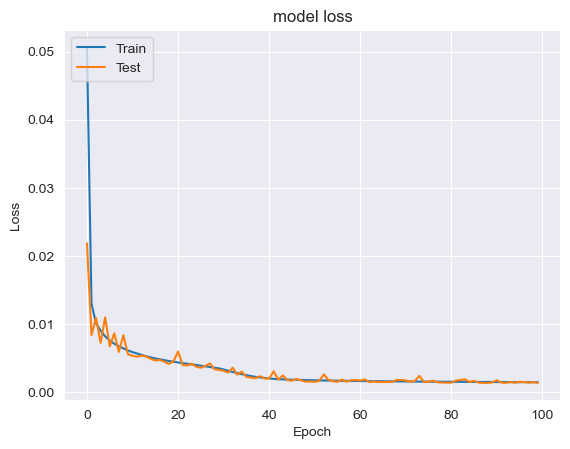

In [86]:
plot_his(history_10)

In [87]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.0014 - rmse: 0.0102 - mae: 0.0014 - mse: 1.0502e-04 - mape: 121405.4297


[0.0014068200252950191,
 0.01024771761149168,
 0.0014068200252950191,
 0.00010501571523491293,
 121405.4296875]

In [88]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [89]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  2390.3833


# Model 11

In [90]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.1593 - rmse: 0.6606 - mae: 0.1593 - mse: 0.4364 - mape: 20875608.0000 - val_loss: 0.0489 - val_rmse: 0.1037 - val_mae: 0.0489 - val_mse: 0.0107 - val_mape: 5940102.0000
Epoch 2/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0468 - rmse: 0.0983 - mae: 0.0468 - mse: 0.0097 - mape: 5620446.5000 - val_loss: 0.0451 - val_rmse: 0.0946 - val_mae: 0.0451 - val_mse: 0.0089 - val_mape: 5266892.0000
Epoch 3/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0438 - rmse: 0.0914 - mae: 0.0438 - mse: 0.0083 - mape: 5054346.5000 - val_loss: 0.0428 - val_rmse: 0.0885 - val_mae: 0.0428 - val_mse: 0.0078 - val_mape: 4880020.5000
Epoch 4/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0419 - rmse: 0.0871 - mae: 0.0419 - mse: 0.0076 - mape: 4706305.0000 - val_loss: 0.0411 - val_rmse: 0.0854 - val_mae: 0.0411 - val_mse: 0.0073 - val_mape: 4495610.5000

Epoch 34/100
24872/24872 [==============================] - 84s 3ms/step - loss: 0.0315 - rmse: 0.0669 - mae: 0.0315 - mse: 0.0045 - mape: 3713728.5000 - val_loss: 0.0316 - val_rmse: 0.0670 - val_mae: 0.0316 - val_mse: 0.0045 - val_mape: 3601581.5000
Epoch 35/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0315 - rmse: 0.0667 - mae: 0.0315 - mse: 0.0045 - mape: 3723508.5000 - val_loss: 0.0315 - val_rmse: 0.0668 - val_mae: 0.0315 - val_mse: 0.0045 - val_mape: 3653238.7500
Epoch 36/100
24872/24872 [==============================] - 83s 3ms/step - loss: 0.0314 - rmse: 0.0665 - mae: 0.0314 - mse: 0.0044 - mape: 3733974.5000 - val_loss: 0.0315 - val_rmse: 0.0668 - val_mae: 0.0315 - val_mse: 0.0045 - val_mape: 3763246.7500
Epoch 37/100
24872/24872 [==============================] - 81s 3ms/step - loss: 0.0314 - rmse: 0.0664 - mae: 0.0314 - mse: 0.0044 - mape: 3745569.7500 - val_loss: 0.0314 - val_rmse: 0.0665 - val_mae: 0.0314 - val_mse: 0.0044 - val_mape: 3710304.0

Epoch 67/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0301 - rmse: 0.0628 - mae: 0.0301 - mse: 0.0039 - mape: 4360495.0000 - val_loss: 0.0301 - val_rmse: 0.0629 - val_mae: 0.0301 - val_mse: 0.0040 - val_mape: 4315156.0000
Epoch 68/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0300 - rmse: 0.0626 - mae: 0.0300 - mse: 0.0039 - mape: 4372987.0000 - val_loss: 0.0301 - val_rmse: 0.0628 - val_mae: 0.0301 - val_mse: 0.0039 - val_mape: 4342200.0000
Epoch 69/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0300 - rmse: 0.0626 - mae: 0.0300 - mse: 0.0039 - mape: 4385736.0000 - val_loss: 0.0300 - val_rmse: 0.0628 - val_mae: 0.0300 - val_mse: 0.0039 - val_mape: 4333711.5000
Epoch 70/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0300 - rmse: 0.0625 - mae: 0.0300 - mse: 0.0039 - mape: 4396933.0000 - val_loss: 0.0300 - val_rmse: 0.0626 - val_mae: 0.0300 - val_mse: 0.0039 - val_mape: 4340742.5

Epoch 100/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0292 - rmse: 0.0605 - mae: 0.0292 - mse: 0.0037 - mape: 4555697.5000 - val_loss: 0.0292 - val_rmse: 0.0607 - val_mae: 0.0292 - val_mse: 0.0037 - val_mape: 4510838.0000
CPU times: total: 3h 26min 55s
Wall time: 2h 14min 45s


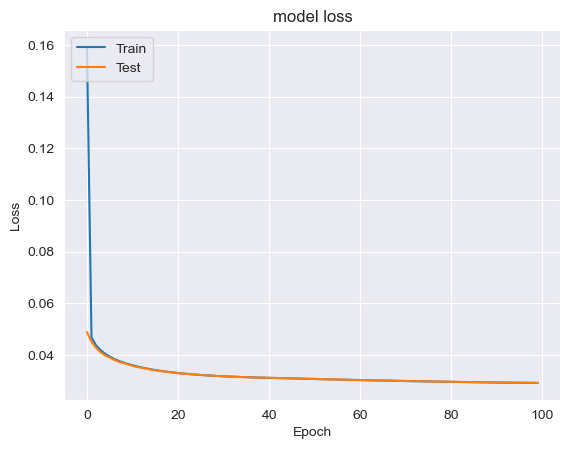

In [91]:
plot_his(history_11)

In [92]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.0292 - rmse: 0.0607 - mae: 0.0292 - mse: 0.0037 - mape: 4510838.0000


[0.02924325317144394,
 0.06065629422664642,
 0.02924325317144394,
 0.0036791858728975058,
 4510838.0]

In [93]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [94]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  11742.221


# Model 12

In [114]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.2176 - rmse: 0.3980 - mae: 0.2176 - mse: 0.1584 - mape: 44826260.0000 - val_loss: 0.1985 - val_rmse: 0.2982 - val_mae: 0.1985 - val_mse: 0.0889 - val_mape: 41279148.0000
Epoch 2/100
12201/24872 [=============>................] - ETA: 31s - loss: 0.2001 - rmse: 0.3063 - mae: 0.2001 - mse: 0.0938 - mape: 41249408.0000

KeyboardInterrupt: 

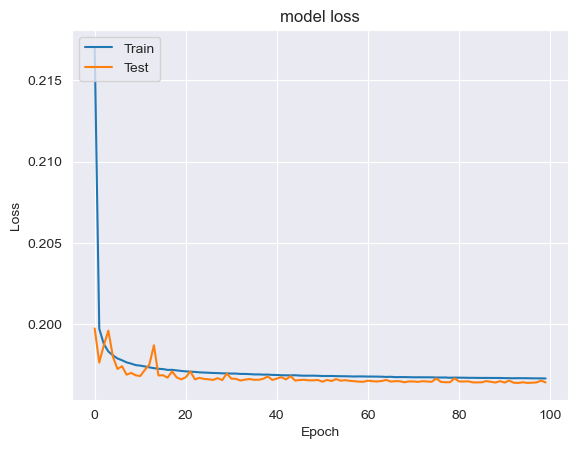

In [115]:
plot_his(history_12)

In [116]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.1983 - rmse: 0.2920 - mae: 0.1983 - mse: 0.0852 - mape: 46994976.0000


[0.1982552856206894,
 0.29197046160697937,
 0.1982552856206894,
 0.0852467492222786,
 46994976.0]

In [117]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [118]:
AIC_value(model_12,prediction_12,Y_test)

AIC:  1586.8312


In [ ]:
model_1.save('Saved_models/model_1_Poweresti.h5')

In [ ]:
model_2.save('Saved_models/model_2_Poweresti.h5')

In [ ]:
model_3.save('Saved_models/model_3_Poweresti.h5')

In [ ]:
model_4.save('Saved_models/model_4_Poweresti.h5')

In [ ]:
model_5.save('Saved_models/model_5_Poweresti.h5')

In [ ]:
model_6.save('Saved_models/model_6_Poweresti.h5')

In [ ]:
model_7.save('Saved_models/model_7_Poweresti.h5')

In [ ]:
model_8.save('Saved_models/model_8_Poweresti.h5')

In [ ]:
model_9.save('Saved_models/model_9_Poweresti.h5')

In [ ]:
model_10.save('Saved_models/model_10_Poweresti.h5')

In [ ]:
model_11.save('Saved_models/model_11_Poweresti.h5')

In [ ]:
model_12.save('Saved_models/model_12_Poweresti.h5')

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
# plt.plot(Y[:20000],color='r')
plt.plot(Y_pred_2[:200],color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
# plt.plot(Y[:20000],color='r')
plt.plot(df['Time'],df["SOC"],color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')